In this notebook I have built the following:
|| Simple CNN on grayscale version of images.
|| CNN on color version of images (with a 3D kernel)
|| CNN w/ multiple kernels (colored imaged)
|| CNN w/ multiple CNN layers(colored imaged).

In [1]:
#Improting
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from framework import (
    ConvolutionalLayer, MaxPoolLayer, FlatteningLayer, CrossEntropy, FullyConnectedLayer ,LogisticSigmoidLayer,InputLayer
)
import pandas as pd
import h5py
#I will only be usign the testing data here since the main training data is massive
x_path = r"C:\Users\aafry\OneDrive\Desktop\CS 615 Project\Data\Test_+_validation_data\camelyonpatch_level_2_split_test_x.h5\camelyonpatch_level_2_split_test_x.h5"
y_path = r"C:\Users\aafry\OneDrive\Desktop\CS 615 Project\Data\Test_+_validation_data\camelyonpatch_level_2_split_test_y.h5\camelyonpatch_level_2_split_test_y.h5"
#Loading data for training
with h5py.File(x_path, "r") as h5f_x:
    x = np.array(h5f_x["x"])
with h5py.File(y_path, "r") as h5f_y:
    y = np.array(h5f_y["y"])
#Data is loaded in as coloured so we need to grey scale it for testing purposes
weights = np.array([0.2989, 0.5870, 0.1140])#RGB to grayscale conversion weights 
#Converting using NP broadcasting
x_gray = np.dot(x[..., :3], weights)
sampled_trainG_data=x_gray[0:30]
sampled_trainC_data=x[0:30]
train_y=y[0:30]
test_x_color=x[110:121]
test_x_gray=x_gray[110:121]
test_y=y[110:121]

In [ ]:
##Inting layers
#Greyscale model
#Modifiable training parameters
LR = 0.01
epochs = 20
#Inting layers
grey_conv_layer = ConvolutionalLayer(kernel_size=3,num_kernels=1)
grey_pool_layer = MaxPoolLayer(pool_size=2, stride=2)
grey_flatten_layer = FlatteningLayer()  
grey_fc_layer = FullyConnectedLayer(sizeIn=2209, sizeOut=1)  
grey_sigmoid_layer = LogisticSigmoidLayer() 
grey_cross_entropy_layer = CrossEntropy()
grey_input_layer= InputLayer(sampled_trainG_data)
train_g=grey_input_layer.forward(sampled_trainG_data)
losses=[]
grey_accuracy_hist=[]
for epoch in range(epochs):
    print(f'Running Epoch : {epoch}')
    epoch_loss = 0
    # Training loop
    for i in range(len(sampled_trainG_data)):  
        x, target = train_g[i], train_y[i]
        # Forward pass
        conv_output = grey_conv_layer.forward(x)
        pool_output = grey_pool_layer.forward(conv_output)
        flattened_output = grey_flatten_layer.forward(pool_output)
        fc_output = grey_fc_layer.forward(flattened_output)
        sig_output = grey_sigmoid_layer.forward(fc_output)
        # Compute loss
        loss = grey_cross_entropy_layer.eval(sig_output, target)
        epoch_loss += loss
        # Backpropagation
        dJdH = sig_output - target
        sig_grad = grey_sigmoid_layer.backward(dJdH)
        fc_grad = grey_fc_layer.backward(sig_grad)
        flattening_grad = grey_flatten_layer.backward(fc_grad)
        pool_grad = grey_pool_layer.backward(flattening_grad)
        conv_grad = grey_conv_layer.backward(pool_grad)
        # Update weights
        grey_fc_layer.updateWeights(dJdH[0], LR)
        grey_conv_layer.updateKernels(dJdH, LR)
    avg_loss = epoch_loss / len(sampled_trainG_data)
    losses.append(avg_loss)
    print(f"Epoch {epoch} Loss: {avg_loss:.4f}")
    correct = 0
    total = len(test_x_gray) 
    for j in range(total):
        x, target = test_x_gray[j], test_y[j]
        # Forward pass (no weight updates)
        conv_output = grey_conv_layer.forward(x)
        pool_output = grey_pool_layer.forward(conv_output)
        flattened_output = grey_flatten_layer.forward(pool_output)
        fc_output = grey_fc_layer.forward(flattened_output)
        sig_output = grey_sigmoid_layer.forward(fc_output)
        relu_output = sig_output.item() if hasattr(sig_output, 'item') else sig_output[0]
        # Binary classification thresholding
        predicted_label = 1 if sig_output >= 0.5 else 0
        if predicted_label == target:
            correct += 1
    grey_accuracy = correct / total
    grey_accuracy_hist.append(grey_accuracy)

    print(f"Epoch {epoch} Grey accuracy: {grey_accuracy:.4f}")







Running Epoch : 0
Epoch 0 Loss: 9.8211


c:\Users\aafry\OneDrive\Desktop\CS 615 Project\LogisticSigmoidLayer.py:13: RuntimeWarning: overflow encountered in exp
  self.previous_output = 1 / (1 + np.exp(-dataIn))


Epoch 0 Grey accuracy: 0.3636
Running Epoch : 1
Epoch 1 Loss: 3.8310
Epoch 1 Grey accuracy: 0.3636
Running Epoch : 2
Epoch 2 Loss: 1.8992
Epoch 2 Grey accuracy: 0.4545
Running Epoch : 3
Epoch 3 Loss: 0.6029
Epoch 3 Grey accuracy: 0.4545
Running Epoch : 4
Epoch 4 Loss: 0.8753
Epoch 4 Grey accuracy: 0.5455
Running Epoch : 5
Epoch 5 Loss: 0.6776
Epoch 5 Grey accuracy: 0.5455
Running Epoch : 6
Epoch 6 Loss: 0.7691
Epoch 6 Grey accuracy: 0.5455
Running Epoch : 7
Epoch 7 Loss: 0.3716
Epoch 7 Grey accuracy: 0.5455
Running Epoch : 8
Epoch 8 Loss: 0.2137
Epoch 8 Grey accuracy: 0.5455
Running Epoch : 9
Epoch 9 Loss: 0.1258
Epoch 9 Grey accuracy: 0.5455
Running Epoch : 10
Epoch 10 Loss: 0.1056
Epoch 10 Grey accuracy: 0.6364
Running Epoch : 11
Epoch 11 Loss: 0.0931
Epoch 11 Grey accuracy: 0.6364
Running Epoch : 12
Epoch 12 Loss: 0.0842
Epoch 12 Grey accuracy: 0.6364
Running Epoch : 13
Epoch 13 Loss: 0.0774
Epoch 13 Grey accuracy: 0.5455
Running Epoch : 14
Epoch 14 Loss: 0.0719
Epoch 14 Grey accura

In [ ]:
# Color model with 3d kernel
lr = 0.01
epochs = 20
# Initializing layers
color_3d_conv_layer = ConvolutionalLayer(kernel_size=3, num_kernels=1)
color_3d_pool_layer = MaxPoolLayer(pool_size=1, stride=1)
color_3d_flatten_layer = FlatteningLayer()  
color_3d_sigmoid_layer = LogisticSigmoidLayer()
color_3d_cross_entropy_layer = CrossEntropy()
color_3d_input_layer = InputLayer(sampled_trainC_data)
train_c = color_3d_input_layer.forward(sampled_trainC_data)
color_3d_fc_layer = FullyConnectedLayer(sizeIn=9024, sizeOut=1)
color_3d_accuracy_hist=[]
losses = []
for epoch in range(epochs):
    print(f'Running Epoch : {epoch}')
    epoch_loss = 0
    # Training loop
    for i in range(len(sampled_trainC_data)):
        x, target = train_c[i], train_y[i]
        # Forward pass
        conv_output = color_3d_conv_layer.forward(x)
        pool_output = color_3d_pool_layer.forward(conv_output)
        flattened_output = color_3d_flatten_layer.forward(pool_output)
        fc_output = color_3d_fc_layer.forward(flattened_output)
        sigmoid_output = color_3d_sigmoid_layer.forward(fc_output)
        loss = color_3d_cross_entropy_layer.eval(sigmoid_output, target)
        epoch_loss += loss
        # Backpropagation
        dJdHC = sigmoid_output - target 
        sigmoid_grad = color_3d_sigmoid_layer.backward(dJdHC)
        fc_grad = color_3d_fc_layer.backward(sigmoid_grad)
        flattening_grad = color_3d_flatten_layer.backward(fc_grad)
        pool_grad = color_3d_pool_layer.backward(flattening_grad)
        conv_grad = color_3d_conv_layer.backward(pool_grad)
        color_3d_fc_layer.updateWeights(dJdHC[0], lr)
        color_3d_conv_layer.updateKernels(dJdHC, lr)
    avg_loss = epoch_loss / len(sampled_trainC_data)
    losses.append(avg_loss)
    print(f"Epoch {epoch} Loss: {avg_loss:.4f}")
    correct = 0
    for i in range(len(test_x_color)): 
        x, target = test_x_color[i], test_y[i]
        conv_output = color_3d_conv_layer.forward(x)
        pool_output = color_3d_pool_layer.forward(conv_output)
        flattened_output = color_3d_flatten_layer.forward(pool_output)
        fc_output = color_3d_fc_layer.forward(flattened_output)
        sigmoid_output = color_3d_sigmoid_layer.forward(fc_output)
        predicted_label = 1 if sigmoid_output >= 0.5 else 0  
        if predicted_label == target:
            correct += 1
    color_3d_accuracy = correct / len(test_x_color)  
    color_3d_accuracy_hist.append(color_3d_accuracy)
    print(f"Epoch {epoch} Color accuracy: {color_3d_accuracy:.4f}")


Running Epoch : 0
Epoch 0 Loss: 10.6639
Epoch 0 Color accuracy: 0.3636
Running Epoch : 1
Epoch 1 Loss: 3.4539
Epoch 1 Color accuracy: 0.4545
Running Epoch : 2
Epoch 2 Loss: 2.3034
Epoch 2 Color accuracy: 0.3636
Running Epoch : 3
Epoch 3 Loss: 2.2803
Epoch 3 Color accuracy: 0.6364
Running Epoch : 4
Epoch 4 Loss: 2.3028
Epoch 4 Color accuracy: 0.6364
Running Epoch : 5
Epoch 5 Loss: 0.0073
Epoch 5 Color accuracy: 0.3636
Running Epoch : 6
Epoch 6 Loss: 0.0000
Epoch 6 Color accuracy: 0.3636
Running Epoch : 7
Epoch 7 Loss: 0.0000
Epoch 7 Color accuracy: 0.3636
Running Epoch : 8
Epoch 8 Loss: 0.0000
Epoch 8 Color accuracy: 0.3636
Running Epoch : 9
Epoch 9 Loss: 0.0000
Epoch 9 Color accuracy: 0.3636
Running Epoch : 10
Epoch 10 Loss: 0.0000
Epoch 10 Color accuracy: 0.3636
Running Epoch : 11
Epoch 11 Loss: 0.0000
Epoch 11 Color accuracy: 0.3636
Running Epoch : 12
Epoch 12 Loss: 0.0000
Epoch 12 Color accuracy: 0.3636
Running Epoch : 13
Epoch 13 Loss: 0.0000
Epoch 13 Color accuracy: 0.3636
Running

In [27]:
#Mutiple kernel model
#Modifiable training parameters
LR = 0.01
epochs = 20
#Inting layers
mult_kern_conv_layer = ConvolutionalLayer(kernel_size=3,num_kernels=3)
mult_kern_pool_layer = MaxPoolLayer(pool_size=1, stride=1)
mult_kern_flatten_layer = FlatteningLayer()  
mult_kern_fc_layer = FullyConnectedLayer(sizeIn=9024, sizeOut=1)  
mult_kern_relu_layer = LogisticSigmoidLayer() 
mult_kern_cross_entropy_layer = CrossEntropy()
mult_kern_input_layer= InputLayer(sampled_trainC_data)
train_c=mult_kern_input_layer.forward(sampled_trainC_data)
losses=[]
mult_kern_accuracy_hist=[]
for epoch in range(epochs):
    print(f'Running Epoch : {epoch}')
    epoch_loss = 0
    # Training loop
    for i in range(len(sampled_trainC_data)):  
        x, target = train_c[i], train_y[i]
        # Forward pass
        conv_output = mult_kern_conv_layer.forward(x)
        pool_output = mult_kern_pool_layer.forward(conv_output)
        flattened_output = mult_kern_flatten_layer.forward(pool_output)
        fc_output = mult_kern_fc_layer.forward(flattened_output)
        relu_output = mult_kern_relu_layer.forward(fc_output)
        #loss
        loss = mult_kern_cross_entropy_layer.eval(relu_output, target)
        epoch_loss += loss
        # Backpropagation
        mult_dJdHC = relu_output - target
        relu_grad = mult_kern_relu_layer.backward(dJdH)
        fc_grad = mult_kern_fc_layer.backward(relu_grad)
        flattening_grad = mult_kern_flatten_layer.backward(fc_grad)
        pool_grad = mult_kern_pool_layer.backward(flattening_grad)
        conv_grad = mult_kern_conv_layer.backward(pool_grad)
        #Update weights
        mult_kern_fc_layer.updateWeights(mult_dJdHC[0], LR)
        mult_kern_conv_layer.updateKernels(mult_dJdHC, LR)
    avg_loss = epoch_loss / len(sampled_trainC_data)
    losses.append(avg_loss)
    print(f"Epoch {epoch} Loss: {avg_loss:.4f}")
    correct = 0
    for i in range(len(test_x_color)):
        x, target = test_x_color[i], test_y[i]
        # Forward pass (no weight updates)
        conv_output = mult_kern_conv_layer.forward(x)
        pool_output = mult_kern_pool_layer.forward(conv_output)
        flattened_output = mult_kern_flatten_layer.forward(pool_output)
        fc_output = mult_kern_fc_layer.forward(flattened_output)
        relu_output = mult_kern_relu_layer.forward(fc_output)
        relu_output = relu_output.item() if hasattr(relu_output, 'item') else relu_output[0]
        predicted_label = 1 if relu_output >= 0.5 else 0
        if predicted_label == target:
            correct += 1
    mult_3d_accuracy = correct / total
    mult_kern_accuracy_hist.append(mult_3d_accuracy)
    print(f"Epoch {epoch} Color accuracy: {mult_3d_accuracy:.4f}")

Running Epoch : 0
Epoch 0 Loss: 10.7898


c:\Users\aafry\OneDrive\Desktop\CS 615 Project\LogisticSigmoidLayer.py:13: RuntimeWarning: overflow encountered in exp
  self.previous_output = 1 / (1 + np.exp(-dataIn))


Epoch 0 Color accuracy: 0.4545
Running Epoch : 1
Epoch 1 Loss: 1.1421
Epoch 1 Color accuracy: 0.6364
Running Epoch : 2
Epoch 2 Loss: 4.3070
Epoch 2 Color accuracy: 0.3636
Running Epoch : 3
Epoch 3 Loss: 4.8839
Epoch 3 Color accuracy: 0.3636
Running Epoch : 4
Epoch 4 Loss: 3.4411
Epoch 4 Color accuracy: 0.2727
Running Epoch : 5
Epoch 5 Loss: 2.3026
Epoch 5 Color accuracy: 0.6364
Running Epoch : 6
Epoch 6 Loss: 2.3022
Epoch 6 Color accuracy: 0.6364
Running Epoch : 7
Epoch 7 Loss: 0.9237
Epoch 7 Color accuracy: 0.3636
Running Epoch : 8
Epoch 8 Loss: 0.0002
Epoch 8 Color accuracy: 0.3636
Running Epoch : 9
Epoch 9 Loss: 0.0002
Epoch 9 Color accuracy: 0.3636
Running Epoch : 10
Epoch 10 Loss: 0.0002
Epoch 10 Color accuracy: 0.3636
Running Epoch : 11
Epoch 11 Loss: 0.0002
Epoch 11 Color accuracy: 0.3636
Running Epoch : 12
Epoch 12 Loss: 0.0002
Epoch 12 Color accuracy: 0.3636
Running Epoch : 13
Epoch 13 Loss: 0.0002
Epoch 13 Color accuracy: 0.3636
Running Epoch : 14
Epoch 14 Loss: 0.0002
Epoch 

In [ ]:
# Modifiable training parameters
LR = 0.01
epochs = 20
# Defining layers
conv_layer1 = ConvolutionalLayer(kernel_size=3, num_kernels=4)  
pool_layer1 = MaxPoolLayer(pool_size=2, stride=2)  
conv_layer2 = ConvolutionalLayer(kernel_size=3, num_kernels=8)  
pool_layer2 = MaxPoolLayer(pool_size=2, stride=1) 
flatten_layer = FlatteningLayer()
fc_layer = FullyConnectedLayer(sizeIn=5808, sizeOut=1)
sigmoid_layer = LogisticSigmoidLayer()  #
cross_entropy_layer = CrossEntropy()
# Input layer
input_layer = InputLayer(sampled_trainC_data)
mult_CNN_accuracy_hist=[]
for epoch in range(epochs):
    print(f'Running Epoch: {epoch}')
    epoch_loss = 0
    # Training loop
    for i in range(len(sampled_trainC_data)):  
        x, target = sampled_trainC_data[i], train_y[i]  
        # Forward pass through all layers
        x_reshaped = np.transpose(x, (2, 0, 1))
        conv_output1 = conv_layer1.forward(x_reshaped)
        pool_output1 = pool_layer1.forward(conv_output1)
        conv_output2 = conv_layer2.forward(pool_output1)
        pool_output2 = pool_layer2.forward(conv_output2)
        flattened_output = flatten_layer.forward(pool_output2)
        # Calculate the correct flattened size
        flattened_size = flattened_output.shape[0]
        fc_output = fc_layer.forward(flattened_output)
        sigmoid_output = sigmoid_layer.forward(fc_output) 
        # Compute loss
        loss = cross_entropy_layer.eval(sigmoid_output, target)
        epoch_loss += loss
        # Backpropagation
        dJdH_sigmoid = sigmoid_output - target 
        sigmoid_grad = sigmoid_layer.backward(dJdH_sigmoid)
        fc_grad = fc_layer.backward(sigmoid_grad)
        flattening_grad = flatten_layer.backward(fc_grad)
        pool_grad2 = pool_layer2.backward(flattening_grad)
        conv_grad2 = conv_layer2.backward(pool_grad2)
        pool_grad1 = pool_layer1.backward(conv_grad2)
        conv_grad1 = conv_layer1.backward(pool_grad1)
        # Update weights
        fc_layer.updateWeights(dJdH_sigmoid[0], LR)s
        conv_layer1.updateKernels(dJdH_sigmoid,LR)
        conv_layer2.updateKernels(dJdH_sigmoid,LR)
    avg_loss = epoch_loss / len(sampled_trainC_data)
    losses.append(avg_loss)
    print(f"Epoch {epoch} Loss: {avg_loss:.4f}")
    correct = 0
    total = len(test_x_color)
    for i in range(total):
        x, target = test_x_color[i], test_y[i]
        # Forward pass (no weight updates)
        x_reshaped = np.transpose(x, (2, 0, 1))
        conv_output1 = conv_layer1.forward(x_reshaped)
        pool_output1 = pool_layer1.forward(conv_output1)
        conv_output2 = conv_layer2.forward(pool_output1)
        pool_output2 = pool_layer2.forward(conv_output2)
        flattened_output = flatten_layer.forward(pool_output2)
        fc_output = fc_layer.forward(flattened_output)
        sigmoid_output = sigmoid_layer.forward(fc_output)  
        sigmoid_output = sigmoid_output.item() if hasattr(sigmoid_output, 'item') else sigmoid_output[0]
        predicted_label = 1 if sigmoid_output >= 0.5 else 0
        if predicted_label == target:
            correct += 1
    mult_CNN_accuracy = correct / total
    mult_CNN_accuracy_hist.append(mult_CNN_accuracy)
    print(f"Epoch {epoch} Color accuracy: {mult_CNN_accuracy:.4f}")



Running Epoch: 0
Epoch 0 Loss: 6.9078
Epoch 0 Color accuracy: 0.6364
Running Epoch: 1
Epoch 1 Loss: 6.9078
Epoch 1 Color accuracy: 0.6364
Running Epoch: 2
Epoch 2 Loss: 10.3616
Epoch 2 Color accuracy: 0.6364
Running Epoch: 3
Epoch 3 Loss: 11.5129
Epoch 3 Color accuracy: 0.6364
Running Epoch: 4
Epoch 4 Loss: 11.5129
Epoch 4 Color accuracy: 0.6364
Running Epoch: 5
Epoch 5 Loss: 5.7565
Epoch 5 Color accuracy: 0.6364
Running Epoch: 6
Epoch 6 Loss: 9.2103
Epoch 6 Color accuracy: 0.4545
Running Epoch: 7
Epoch 7 Loss: 9.2103
Epoch 7 Color accuracy: 0.4545
Running Epoch: 8
Epoch 8 Loss: 9.2103
Epoch 8 Color accuracy: 0.4545
Running Epoch: 9
Epoch 9 Loss: 3.4539
Epoch 9 Color accuracy: 0.6364
Running Epoch: 10
Epoch 10 Loss: 9.2103
Epoch 10 Color accuracy: 0.3636
Running Epoch: 11
Epoch 11 Loss: 5.7565
Epoch 11 Color accuracy: 0.4545
Running Epoch: 12
Epoch 12 Loss: 9.2103
Epoch 12 Color accuracy: 0.6364
Running Epoch: 13
Epoch 13 Loss: 6.9078
Epoch 13 Color accuracy: 0.6364
Running Epoch: 14
E

Text(0, 0.5, 'Accuracy (in decimal format)')

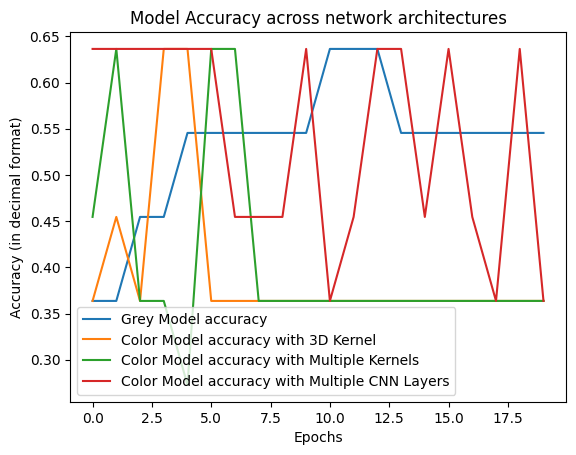

In [35]:
#Plot everything
plt.plot(grey_accuracy_hist, label='Grey Model accuracy')
plt.plot(color_3d_accuracy_hist, label='Color Model accuracy with 3D Kernel')
plt.plot(mult_kern_accuracy_hist, label='Color Model accuracy with Multiple Kernels')
plt.plot(mult_CNN_accuracy_hist, label='Color Model accuracy with Multiple CNN Layers')
plt.title('Model Accuracy across network architectures')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in decimal format)')